#### 1. Load the dataset into a Pandas DataFrame and explore the data.

In [1]:

import pandas as pd
import numpy as np

df = pd.read_csv('boston housing.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### 2. Create a scatter plot to visualize the relationship between the 'MEDV' and 'LSTAT' columns.


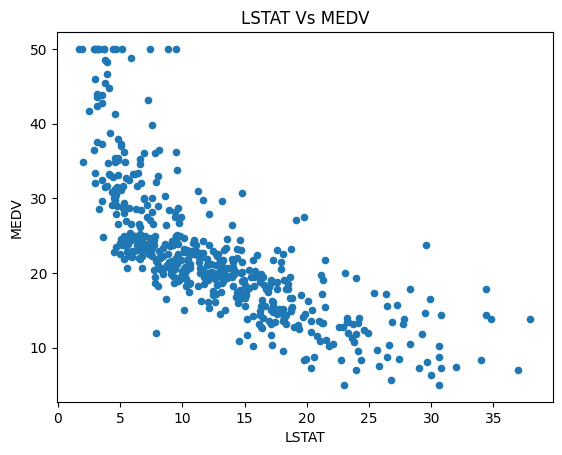

In [2]:
import matplotlib.pyplot as plt

df.plot.scatter(x='LSTAT', y='MEDV')
plt.title("LSTAT Vs MEDV")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

#### 3. Based on the scatter plot, what can you say about the relationship between the 'MEDV' and 'LSTAT' columns?

#### Based on the scatter plot, we can see that there is a negative relationship between the 'MEDV' and 'LSTAT' columns. As the percentage of lower status of the population ('LSTAT') increases, the median value of owner-occupied homes ('MEDV') tends to decrease. This relationship is fairly strong, as we can see a clear downward trend in the scatter plot. We can also see that there are some data points that are clearly separated from the main cluster, which may be potential outliers.

#### 4.Calculate the correlation coefficient between the 'MEDV' and 'LSTAT' columns

In [3]:
x = df['LSTAT']
y = df['MEDV']

correlation = df['MEDV'].corr(df['LSTAT'])
correlation

-0.7376627261740148

## multivariate linear regression

#### 1. Fit a multivariate linear regression model to predict the 'MEDV' column using the 'RM', 'LSTAT', and 'PTRATIO' columns. Print the coefficients and intercept of the regression line.

In [4]:

X = df[['RM', 'LSTAT', 'PTRATIO']]
y = df['MEDV']

X = np.c_[np.ones(X.shape[0]), X]

coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('Intercept:', coefficients[0])
print('Coefficients:', coefficients[1:])


Intercept: 18.567111505395737
Coefficients: [ 4.51542094 -0.57180569 -0.93072256]


#### 2. Calculate the R-squared value for the multivariate linear regression model from question 1.

In [5]:
X = df[['RM', 'LSTAT', 'PTRATIO']]
y = df['MEDV']

X = np.c_[np.ones(X.shape[0]), X]

coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_pred = X.dot(coefficients)

sse = np.sum((y - y_pred)**2)
sst = np.sum((y - np.mean(y))**2)

r_squared = 1 - (sse / sst)
print('R-squared:', r_squared)


R-squared: 0.6786241601613112


#### 3. Create a scatter plot to visualize the relationship between the predicted values and the actual 'MEDV' values from the multivariate linear regression model.

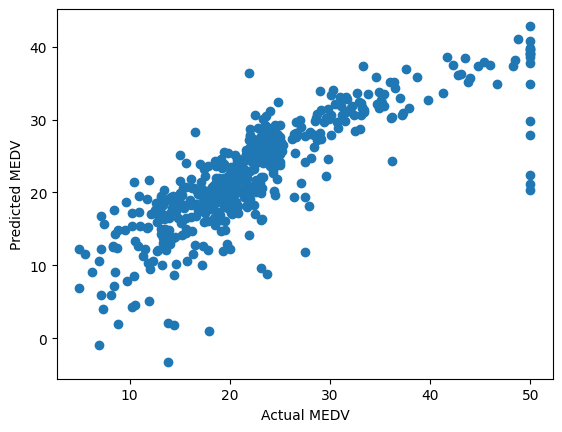

In [6]:
X = df[['RM', 'LSTAT', 'PTRATIO']]
y = df['MEDV']

X = np.c_[np.ones(X.shape[0]), X]

coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_pred = X.dot(coefficients)

plt.scatter(y, y_pred)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.show()


In [7]:
x = df[['RM', 'LSTAT', 'PTRATIO']]
y = df['MEDV']

x = np.column_stack((x, np.ones(len(x)))) # add a column of ones for the intercept term

# calculate beta coefficients using the normal equation
beta = np.linalg.inv(x.T @ x) @ x.T @ y

# predict MEDV for a house with 6 rooms, 10% lower status population, and a pupil-teacher ratio of 20
new_data = np.array([6, 10, 20, 1])
medv = new_data @ beta

print('Predicted MEDV:', medv)

Predicted MEDV: 21.32712918439104


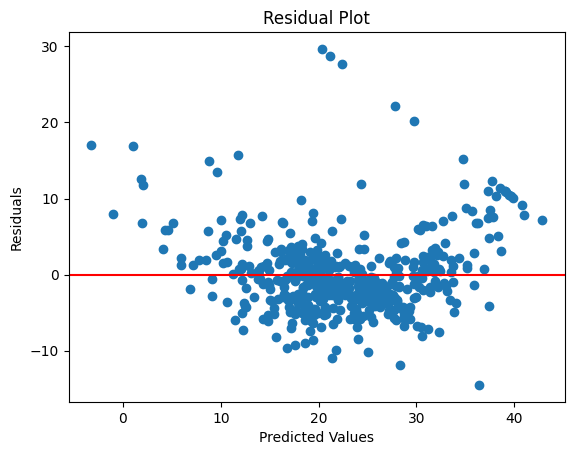

In [8]:
# select the predictor variables and response variable
X = df[['RM', 'LSTAT', 'PTRATIO']]
y = df['MEDV']

# add a constant to the predictor variables
X = np.c_[np.ones(X.shape[0]), X]

# calculate the regression coefficients
coeffs = np.linalg.inv(X.T @ X) @ X.T @ y

# make predictions using the model
y_pred = X @ coeffs

# calculate the residuals
residuals = y - y_pred

# create a scatter plot of the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
